# 6.4 Supervised Machine Learning: Regression

# Contents
## 1. Importing Libraries and Data
## 2. Data Review and Cleaning
## 3. Data Prep for Regression Analysis
## 4. Regressinon Analysis
## 5. Check the model performance statistics (MSE and R2 score)
## 6.Conclusions

### Hypothesis to test: The higher the GDP value of a country is, the more the number of billioanres there are in that country.

# 1. Importing Libraries and Data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# import path of dataframe
path = r"C:\Users\bhimc\Documents\Career Foundry (Achievement 6)"

In [4]:
path

'C:\\Users\\bhimc\\Documents\\Career Foundry (Achievement 6)'

In [5]:
# Import the Cleaned dataset of World Billionares 
df_world = pd.read_csv(os.path.join(path, 'World Billionares', '02 Data','Prepared Data', 'df_world_billionaires.csv'))

## 2. Data Review and Cleaning

In [6]:
df_world.head()

,Unnamed: 0.1,Unnamed: 0,rank,final_worth,category,person_name,age,country,city,source,...,gdp_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country,birth_data
0,0,0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,...,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,3/5/1949 0:00
1,1,1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,6/28/1971 0:00
2,2,2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1/12/1964 0:00
3,3,3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/17/1944 0:00
4,4,4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/30/1930 0:00


In [7]:
# Delete unnecessary columns
df_world.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

,rank,final_worth,category,person_name,age,country,city,source,industries,country_of_citizenship,...,gdp_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country,birth_data
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,Fashion & Retail,France,...,2.715518e+12,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,3/5/1949 0:00
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,6/28/1971 0:00
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,Technology,United States,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1/12/1964 0:00
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,Technology,United States,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,8/17/1944 0:00
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,8/30/1930 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51,China,Shanghai,Health clinics,Healthcare,China,...,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,12/14/1971 0:00
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80,United States,Pottsville,Beer,Food & Beverage,United States,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,3/10/1943 0:00
2637,2540,1000,Manufacturing,Zhang Gongyun,60,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,12/18/1962 0:00
2638,2540,1000,Real Estate,Zhang Guiping & family,71,China,Nanjing,Real estate,Real Estate,China,...,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,8/21/1951 0:00


In [8]:
df_world.shape

(2640, 35)

In [9]:
# Create a dataframe for number of billionaries in each country
World_billionaires = df_world['country'].value_counts()

In [10]:
World_billionaires.head()

country
United States     754
China             523
India             157
Germany           102
United Kingdom     82
Name: count, dtype: int64

In [11]:
World_billionaires.isnull().sum()

0

In [12]:
# Reindexing the column for World_billionaires data
world_billionaires = df_world['country'].value_counts().reset_index()

In [13]:
world_billionaires

,country,count
0,United States,754
1,China,523
2,India,157
3,Germany,102
4,United Kingdom,82
...,...,...
74,Portugal,1
75,Georgia,1
76,Colombia,1
77,Uzbekistan,1


In [14]:
# Merge the subdata frame with the df_world data
df_world = pd.merge(df_world, world_billionaires, on='country', how='left')

In [15]:
df_world.head()

,Unnamed: 0.1,Unnamed: 0,rank,final_worth,category,person_name,age,country,city,source,...,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country,birth_data,count
0,0,0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,...,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,3/5/1949 0:00,35
1,1,1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,6/28/1971 0:00,754
2,2,2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1/12/1964 0:00,754
3,3,3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/17/1944 0:00,754
4,4,4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/30/1930 0:00,754


In [16]:
df_world.rename(columns = {'count':'world_billionaires'},inplace = True)

In [17]:
# Delete unnecessary columns
df_world.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [18]:
df_world.head()

,rank,final_worth,category,person_name,age,country,city,source,industries,country_of_citizenship,...,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country,birth_data,world_billionaires
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,Fashion & Retail,France,...,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,3/5/1949 0:00,35
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,6/28/1971 0:00,754
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,Technology,United States,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1/12/1964 0:00,754
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,Technology,United States,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/17/1944 0:00,754
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/30/1930 0:00,754


## Scatterplot explorations
### Using scatterplots to look for possible corelation of two variables "gdp_country" vs "world_billionaries" ('world_billionaries' the total number of billionaries in each country)I'll make use of these two variables for the rest of my research.

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


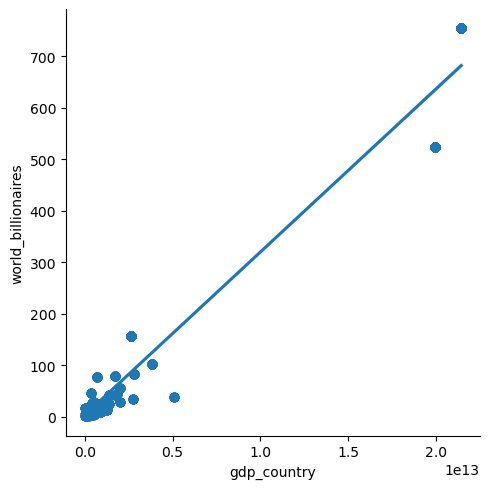

In [19]:
# Seaborn scatterplot for each country's gdp vs. the total number of billionaires in each country

sns.lmplot(x = 'gdp_country', y = 'world_billionaires', data = df_world)

## Checking for Outliers

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


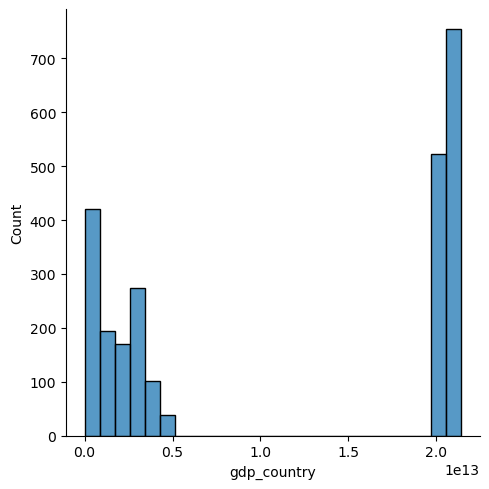

In [20]:
# Shows extreme values
sns.displot(df_world['gdp_country'], bins=25)

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


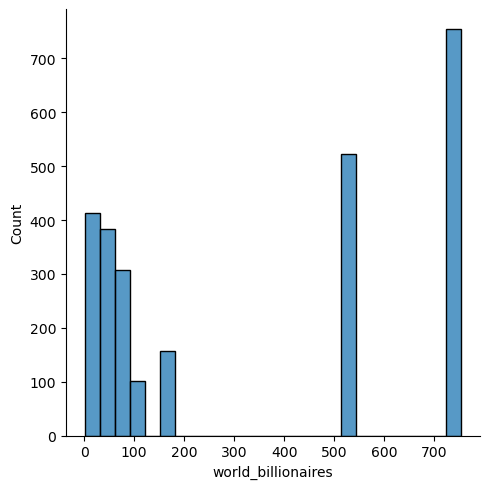

In [21]:
# Shows extreme values
sns.displot(df_world['world_billionaires'], bins=25)

#### There appear to be two outliers in both GDP and billionaires. There are two countries with GDPs greater than 10 trillion. The majority are less than six trillion. I'm going to compare the numbers of billionaires in those two categories.

In [22]:
# Create subsets

gdp_big = df_world[df_world['gdp_country'] > 10_000_000_000_000]

In [23]:
gdp_small = df_world[df_world['gdp_country'] <=10_000_000_000_000]

In [24]:
# I was able to use this code with the help of ChatGPT
gdp_big['country'].unique()

array(['United States', 'China'], dtype=object)

In [25]:
gdp_small['country'].unique()

array(['France', 'Mexico', 'India', 'Spain', 'Canada', 'Germany',
       'Switzerland', 'Belgium', 'Austria', 'Japan', 'United Kingdom',
       'Australia', 'Indonesia', 'United Arab Emirates', 'Russia',
       'Chile', 'Monaco', 'Czech Republic', 'Sweden', 'Thailand',
       'Uzbekistan', 'Singapore', 'Nigeria', 'Israel', 'Italy',
       'South Africa', 'Brazil', 'Malaysia', 'South Korea', 'New Zealand',
       'Philippines', 'Norway', 'Egypt', 'Denmark', 'Colombia',
       'Netherlands', 'Poland', 'Ukraine', 'Greece', 'Turkey',
       'Argentina', 'Georgia', 'Portugal', 'Kazakhstan', 'Algeria',
       'Vietnam', 'Latvia', 'Finland', 'Luxembourg', 'Cambodia',
       'Lebanon', 'Oman', 'Cyprus', 'Liechtenstein', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Morocco', 'Hungary', 'Tanzania',
       'Bahrain', 'Peru', 'Andorra', 'Armenia'], dtype=object)

In [26]:
gdp_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 2639
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     1199 non-null   int64  
 1   final_worth              1199 non-null   int64  
 2   category                 1199 non-null   object 
 3   person_name              1199 non-null   object 
 4   age                      1199 non-null   int64  
 5   country                  1199 non-null   object 
 6   city                     1174 non-null   object 
 7   source                   1199 non-null   object 
 8   industries               1199 non-null   object 
 9   country_of_citizenship   1199 non-null   object 
 10  self_made                1199 non-null   bool   
 11  status                   1199 non-null   object 
 12  gender                   1199 non-null   object 
 13  birth_date               1167 non-null   object 
 14  last_name                1199

In [27]:
gdp_big.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 1 to 2638
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     1277 non-null   int64  
 1   final_worth              1277 non-null   int64  
 2   category                 1277 non-null   object 
 3   person_name              1277 non-null   object 
 4   age                      1277 non-null   int64  
 5   country                  1277 non-null   object 
 6   city                     1273 non-null   object 
 7   source                   1277 non-null   object 
 8   industries               1277 non-null   object 
 9   country_of_citizenship   1277 non-null   object 
 10  self_made                1277 non-null   bool   
 11  status                   1277 non-null   object 
 12  gender                   1277 non-null   object 
 13  birth_date               1250 non-null   object 
 14  last_name                1277

In [28]:
df_world['gdp_country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2640 entries, 0 to 2639
Series name: gdp_country
Non-Null Count  Dtype  
--------------  -----  
2476 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


### There are 1199 billionaires in countries with a small GDP and 277 billionaires in countries with a big GDP, also there are 2476 non-null value for gdp_country
 ### Due to their high GDPs, the United States and China have more billionaires than any other country.

## 3. Data Prep for Regression Analysis
### Split the data into two sets: a training set and a test set

In [30]:
#  Reshape the variables into NumPy arrays and put them into separate objects.

X = df_world['gdp_country'].values.reshape(-1,1)
y = df_world['world_billionaires'].values.reshape(-1,1)

In [31]:
X

array([[2.71551827e+12],
       [2.14277000e+13],
       [2.14277000e+13],
       ...,
       [1.99100000e+13],
       [1.99100000e+13],
       [3.76795509e+11]])

In [32]:
y

array([[ 35],
       [754],
       [754],
       ...,
       [523],
       [523],
       [ 14]], dtype=int64)

In [33]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Create a regression object.
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression()

In [35]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### It appears that the linear regression model cannot include any NaN values. For this regression, I'll clean up the data set of Nan values in the 'gdp_country' column.

In [36]:
df_world['gdp_country'].isnull().sum()

164

In [37]:
# Create a new dataframe with the records dropped that have NaN in 'gdp_country'

df_world_gdp = df_world.dropna(subset=['gdp_country'])

In [38]:
df_world_gdp['gdp_country'].isnull().sum()

0

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects using the new subset.

X = df_world_gdp['gdp_country'].values.reshape(-1,1)
y = df_world_gdp['world_billionaires'].values.reshape(-1,1)

In [42]:
X

array([[2.71551827e+12],
       [2.14277000e+13],
       [2.14277000e+13],
       ...,
       [1.99100000e+13],
       [1.99100000e+13],
       [3.76795509e+11]])

In [43]:
y

array([[ 35],
       [754],
       [754],
       ...,
       [523],
       [523],
       [ 14]], dtype=int64)

In [44]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# Again, create a regression object

regression = LinearRegression()

In [46]:
#  fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using x

y_predicted = regression.predict(X_test)

## 4. Regressinon Analysis

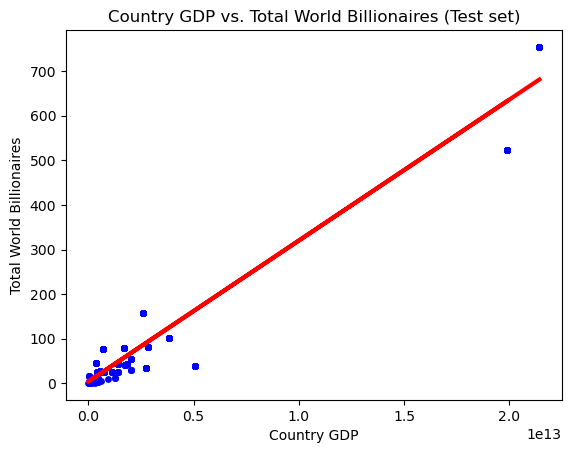

In [55]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Country GDP vs. Total World Billionaires (Test set)')
plot_test.xlabel('Country GDP')
plot_test.ylabel('Total World Billionaires')
plot_test.show()

### The regression model looks to match the data well since the points group a little along the line. However, the data points might show more dispersion if we remove the US and China, with their large GDP and number of world billionaires

## 5. Check the model performance statistics (MSE and R2 score)

In [49]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.15881171e-11]]
Mean squared error:  5146.32653425634
R2 score:  0.9476070376310997


In [51]:
# Compare the predicted y values with the actual y values in a dataframe.

data = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,754,681.010097
1,754,681.010097
2,102,125.625612
3,43,48.141558
4,523,633.068812
5,157,86.625974
6,754,681.010097
7,523,633.068812
8,523,633.068812
9,157,86.625974


### Compare how the regression fits the training set

In [52]:
# Predicting the X_train

y_predicted_train = regression.predict(X_train)

In [53]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.15881171e-11]]
Mean squared error:  4910.1386838445405
R2 score:  0.9489048741853466


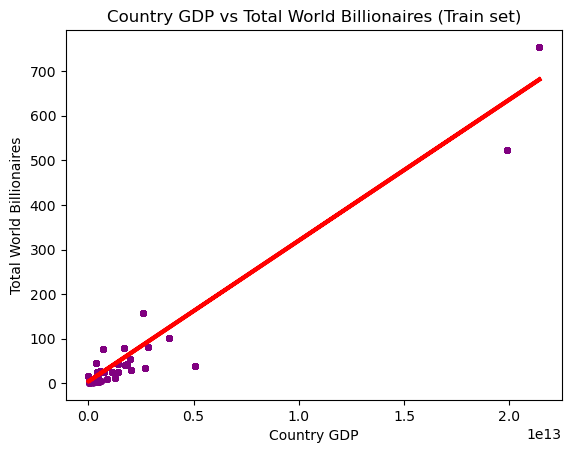

In [57]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='purple', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Country GDP vs Total World Billionaires (Train set)')
plot_test.xlabel('Country GDP')
plot_test.ylabel('Total World Billionaires')
plot_test.show()

## 6.Conclusions

### I feel happy with how the model performed on the test. Both the training and test sets had comparatively the same slopes and R2 values. However, the mean squared error is quite small in the Training Set it was slighty less at  4910.1386838445405 compared to the Test Set at  5146.32653425634 it would be better if this was match.There is R2 values close to 1 indicate a strong correlation between a country's GDP and the number of world billionaires.

### Possible Bias: With 2,476 data evaluated, there may be insufficient observations to develop a trustworthy regression model. Also, there are considerable differences from the regression line, indicating that other variables are at play. Considering this, it appears that a strong relationship. Removing outliers like the United States and China from the model is difficult since they have the greatest GDPs and the highest number of billionaires. Also, their combined billionaire count greter than all other countries, potentially confusing the results. To do such an analysis, the majority of the data would need to be removed. This has the potential to significantly biased truth.

In [60]:
#Exporting df_World dataset)

df_world_gdp.to_csv(os.path.join(path, 'World Billionares', '02 Data','Prepared Data', 'df_world_gdp.csv'))